# Análisis Estadístico del Nivel de Servicio de Entregas a Clientes

Este cuaderno realiza un análisis estadístico del nivel de servicio en las entregas a clientes de un fabricante de productos de gran consumo. Se abordan los siguientes puntos:
1. **Simulación de datos**: Datos simulados representando el tiempo de entrega de pedidos.
2. **Cálculo de Intervalos de Confianza**: Evaluación de la media del tiempo de entrega.
3. **Contraste de Hipótesis**: Comprobación de si el tiempo de entrega promedio cumple con el objetivo establecido.
4. **Visualización**: Gráficos para ayudar en la interpretación de los resultados.

In [1]:
# Importar bibliotecas necesarias
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

## Parámetros de Entrada
Definimos los parámetros para simular los datos de entregas, como el tiempo de entrega objetivo y el nivel de confianza para los intervalos de confianza.

In [2]:
# Parámetros de entrada
np.random.seed(42)  # Semilla para reproducibilidad
n = 100  # Número de pedidos simulados
tiempo_objetivo = 3  # Tiempo de entrega objetivo en días
desviacion_real = 0.5  # Desviación estándar del tiempo de entrega en días

# Niveles de confianza y significancia
nivel_confianza = 0.95
nivel_significancia = 0.05  # Complemento del nivel de confianza

## Simulación de Datos de Entregas
Simulamos los tiempos de entrega de los pedidos siguiendo una distribución normal con media alrededor del objetivo y la desviación estándar proporcionada.

In [3]:
# Simulamos los tiempos de entrega
tiempos_entrega = np.random.normal(loc=tiempo_objetivo, scale=desviacion_real, size=n)

## Cálculo del Intervalo de Confianza
Calculamos el intervalo de confianza para la media de los tiempos de entrega utilizando la distribución t de Student, para obtener un rango dentro del cual esperamos que se encuentre la media real del tiempo de entrega.

In [4]:
# Cálculo del intervalo de confianza
media_muestral = np.mean(tiempos_entrega)
error_estandar = stats.sem(tiempos_entrega)

intervalo = stats.t.interval(
    confidence=nivel_confianza,  # Nivel de confianza
    df=n-1,  # Grados de libertad
    loc=media_muestral,  # Media muestral
    scale=error_estandar  # Error estándar
)

print("Intervalo de confianza al 95% para el tiempo de entrega promedio:", intervalo)

Intervalo de confianza al 95% para el tiempo de entrega promedio: (np.float64(2.8579765818190497), np.float64(3.0381769007868566))


## Contraste de Hipótesis
Realizamos un contraste de hipótesis para verificar si el tiempo promedio de entrega es significativamente mayor que el tiempo objetivo de 3 días.
- **Hipótesis nula (H0)**: El tiempo promedio de entrega es igual a 3 días.
- **Hipótesis alternativa (H1)**: El tiempo promedio de entrega es mayor a 3 días.

Realizamos un test *t* de una muestra y comparamos el p-valor con el nivel de significancia para tomar una decisión sobre H0.

In [5]:
# Realizamos el contraste de hipótesis
estadistico, p_valor = stats.ttest_1samp(tiempos_entrega, popmean=tiempo_objetivo)

print("\nResultados del contraste de hipótesis:")
print(f"Estadístico t: {estadistico:.2f}")
print(f"P-valor: {p_valor:.4f}")

if p_valor < nivel_significancia:
    print("Rechazamos H0: El tiempo promedio de entrega es significativamente mayor a 3 días.")
else:
    print("No rechazamos H0: No hay evidencia suficiente para afirmar que el tiempo de entrega es mayor a 3 días.")


Resultados del contraste de hipótesis:
Estadístico t: -1.14
P-valor: 0.2556
No rechazamos H0: No hay evidencia suficiente para afirmar que el tiempo de entrega es mayor a 3 días.


## Visualización de Resultados
Para una mejor comprensión de los resultados, visualizamos los tiempos de entrega en un histograma y mostramos el intervalo de confianza y la media muestral.

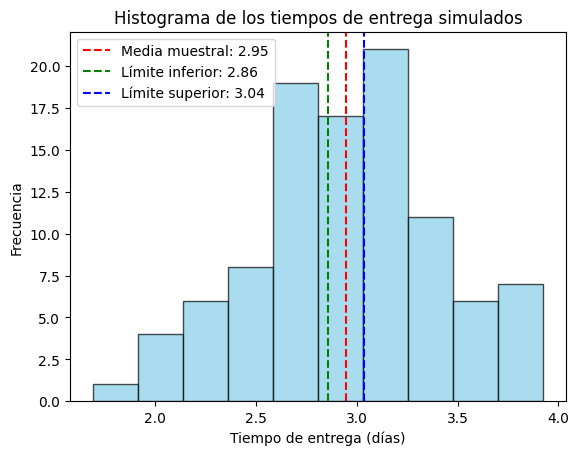

In [6]:
# Histograma de los tiempos de entrega
plt.hist(tiempos_entrega, bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(media_muestral, color='red', linestyle='--', label=f'Media muestral: {media_muestral:.2f}')
plt.axvline(intervalo[0], color='green', linestyle='--', label=f'Límite inferior: {intervalo[0]:.2f}')
plt.axvline(intervalo[1], color='blue', linestyle='--', label=f'Límite superior: {intervalo[1]:.2f}')
plt.title("Histograma de los tiempos de entrega simulados")
plt.xlabel("Tiempo de entrega (días)")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

## Análisis Final y Conclusión
### Análisis
- **Intervalo de confianza**: Si el tiempo objetivo de 3 días se encuentra dentro del intervalo de confianza, no hay evidencia suficiente para afirmar que los tiempos de entrega sean significativamente mayores.
- **Contraste de hipótesis**: Si el p-valor es menor que el nivel de significancia (0.05), rechazamos la hipótesis nula, indicando que el tiempo de entrega es mayor al objetivo.

### Conclusión
- **Rechazo de H0**: Si rechazamos H0, concluimos que los tiempos de entrega son significativamente mayores que el objetivo de 3 días, lo que podría indicar ineficiencias o problemas en el proceso.
- **No rechazo de H0**: Si no rechazamos H0, no tenemos evidencia suficiente para afirmar que los tiempos de entrega son mayores a 3 días.